## Install dependencies and create a virtual screen 🔽


In [2]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 2 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,239 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 120624 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubun

In [3]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

INFO: pip is looking at multiple versions of gymnasium[box2d] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of gymnasium[box2d] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,885 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [70.9 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,605 kB]
Get:14 http

In [5]:
!pip install huggingface_sb3 stable_baselines3 gymnasium[box2d]

  Using cached huggingface_sb3-3.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached swig-4.4.1-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.6 MB/s eta 0:00:00


In [1]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Import the packages 📦


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os

from stable_baselines3 import PPO, DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

# For video recording and display
from gymnasium.wrappers import RecordVideo
from IPython.display import Video, display, FileLink

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Create Environment

In [3]:
# Create directories to save logs and models
log_dir = "logs/"
ppo_log_dir = os.path.join(log_dir, "ppo/")
dqn_log_dir = os.path.join(log_dir, "dqn/")
os.makedirs(ppo_log_dir, exist_ok=True)
os.makedirs(dqn_log_dir, exist_ok=True)

## USING PPO

In [4]:
print("\n--- Training PPO Model ---")

# Create a training environment that saves logs to the correct directory
train_env_ppo = make_vec_env('LunarLander-v3', n_envs=16, monitor_dir=ppo_log_dir)

# Create a separate, non-vectorized environment for evaluation
eval_env_ppo = Monitor(gym.make("LunarLander-v3"))

# Use an EvalCallback to save the best model during training
eval_callback_ppo = EvalCallback(eval_env_ppo, best_model_save_path=ppo_log_dir,
                                 log_path=ppo_log_dir, eval_freq=5000,
                                 deterministic=True, render=False)

# Tuned hyperparameters for PPO
model_PPO = PPO(
    policy='MlpPolicy',
    env=train_env_ppo, # **FIX:** Use the new environment
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.999,
    gae_lambda=0.98,
    ent_coef=0.01,
    learning_rate=3e-4,
    verbose=1
)

TOTAL_TIMESTEPS = 2500000
model_PPO.learn(total_timesteps=TOTAL_TIMESTEPS, callback=eval_callback_ppo, progress_bar=True)



--- Training PPO Model ---


<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to 

Using cpu device


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Output()

/usr/local/lib/python3.12/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94       |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 2605     |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 16384    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 91.1         |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 1738         |
|    iterations           | 2            |
|    time_elapsed         | 18           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0077231578 |
|    clip_fraction        | 0.0592       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.000892     |
|    learning_r

Eval num_timesteps=80000, episode_reward=24.41 +/- 89.88

Episode length: 258.40 +/- 62.94

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 258          |
|    mean_reward          | 24.4         |
| time/                   |              |
|    total_timesteps      | 80000        |
| train/                  |              |
|    approx_kl            | 0.0071073147 |
|    clip_fraction        | 0.0615       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -0.00145     |
|    learning_rate        | 0.0003       |
|    loss                 | 254          |
|    n_updates            | 16           |
|    policy_gradient_loss | -0.00319     |
|    value_loss           | 598          |
------------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.4     |
|    ep_rew_mean     | -95.7    |
| time/              |          |
|    fps             | 1542     |
|    iterations      | 5        |
|    time_elapsed    | 53       |
|    total_timesteps | 81920    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 94.7        |
|    ep_rew_mean          | -81.3       |
| time/                   |             |
|    fps                  | 1546        |
|    iterations           | 6           |
|    time_elapsed         | 63          |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.007407842 |
|    clip_fraction        | 0.0962      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | -0.00377    |
|    learning_rate        | 0.

Eval num_timesteps=160000, episode_reward=-116.29 +/- 44.56

Episode length: 541.60 +/- 156.39

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 542          |
|    mean_reward          | -116         |
| time/                   |              |
|    total_timesteps      | 160000       |
| train/                  |              |
|    approx_kl            | 0.0074458937 |
|    clip_fraction        | 0.044        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.19        |
|    explained_variance   | 0.000743     |
|    learning_rate        | 0.0003       |
|    loss                 | 223          |
|    n_updates            | 36           |
|    policy_gradient_loss | -0.00261     |
|    value_loss           | 473          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 125      |
|    ep_rew_mean     | -13      |
| time/              |          |
|    fps             | 1453     |
|    iterations      |

Eval num_timesteps=240000, episode_reward=-131.98 +/- 28.07

Episode length: 474.00 +/- 99.77

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 474          |
|    mean_reward          | -132         |
| time/                   |              |
|    total_timesteps      | 240000       |
| train/                  |              |
|    approx_kl            | 0.0048846346 |
|    clip_fraction        | 0.0522       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.18        |
|    explained_variance   | -0.00163     |
|    learning_rate        | 0.0003       |
|    loss                 | 337          |
|    n_updates            | 56           |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 693          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 222      |
|    ep_rew_mean     | -7.23    |
| time/              |          |
|    fps             | 1219     |
|    iterations      |

Eval num_timesteps=320000, episode_reward=-140.65 +/- 47.73

Episode length: 704.20 +/- 217.52

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 704          |
|    mean_reward          | -141         |
| time/                   |              |
|    total_timesteps      | 320000       |
| train/                  |              |
|    approx_kl            | 0.0040592737 |
|    clip_fraction        | 0.0276       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.16        |
|    explained_variance   | 0.617        |
|    learning_rate        | 0.0003       |
|    loss                 | 88.1         |
|    n_updates            | 76           |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 362          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 559      |
|    ep_rew_mean     | 23.3     |
| time/              |          |
|    fps             | 973      |
|    iterations      |

Eval num_timesteps=400000, episode_reward=-14.35 +/- 9.93

Episode length: 1000.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | -14.3        |
| time/                   |              |
|    total_timesteps      | 400000       |
| train/                  |              |
|    approx_kl            | 0.0050826008 |
|    clip_fraction        | 0.0358       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 0.847        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.8         |
|    n_updates            | 96           |
|    policy_gradient_loss | -0.000889    |
|    value_loss           | 134          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 713      |
|    ep_rew_mean     | 64.5     |
| time/              |          |
|    fps             | 875      |
|    iterations      |

Eval num_timesteps=480000, episode_reward=4.91 +/- 134.34

Episode length: 533.20 +/- 62.80

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 533          |
|    mean_reward          | 4.91         |
| time/                   |              |
|    total_timesteps      | 480000       |
| train/                  |              |
|    approx_kl            | 0.0040319813 |
|    clip_fraction        | 0.0362       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.07        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 14.5         |
|    n_updates            | 116          |
|    policy_gradient_loss | -0.000835    |
|    value_loss           | 46.6         |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 858      |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    fps             | 805      |
|    iterations      |

Eval num_timesteps=560000, episode_reward=97.56 +/- 123.96

Episode length: 534.20 +/- 131.05

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 534          |
|    mean_reward          | 97.6         |
| time/                   |              |
|    total_timesteps      | 560000       |
| train/                  |              |
|    approx_kl            | 0.0053790607 |
|    clip_fraction        | 0.0419       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.929        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.8         |
|    n_updates            | 136          |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 59.1         |
------------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 845      |
|    ep_rew_mean     | 86.6     |
| time/              |          |
|    fps             | 765      |
|    iterations      | 35       |
|    time_elapsed    | 749      |
|    total_timesteps | 573440   |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 859          |
|    ep_rew_mean          | 96.7         |
| time/                   |              |
|    fps                  | 760          |
|    iterations           | 36           |
|    time_elapsed         | 775          |
|    total_timesteps      | 589824       |
| train/                  |              |
|    approx_kl            | 0.0041041262 |
|    clip_fraction        | 0.0322       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.879        |
|    learning_r

Eval num_timesteps=640000, episode_reward=216.40 +/- 15.54

Episode length: 479.00 +/- 17.18

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 479         |
|    mean_reward          | 216         |
| time/                   |             |
|    total_timesteps      | 640000      |
| train/                  |             |
|    approx_kl            | 0.006522376 |
|    clip_fraction        | 0.0452      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.33        |
|    n_updates            | 156         |
|    policy_gradient_loss | -8.56e-05   |
|    value_loss           | 83.5        |
-----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 826      |
|    ep_rew_mean     | 119      |
| time/              |          |
|    fps             | 742      |
|    iterations      | 40       |
|    time_elapsed    | 882      |
|    total_timesteps | 655360   |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 839          |
|    ep_rew_mean          | 122          |
| time/                   |              |
|    fps                  | 735          |
|    iterations           | 41           |
|    time_elapsed         | 912          |
|    total_timesteps      | 671744       |
| train/                  |              |
|    approx_kl            | 0.0063283816 |
|    clip_fraction        | 0.0465       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | 0.969        |
|    learning_r

Eval num_timesteps=720000, episode_reward=239.17 +/- 31.54

Episode length: 425.80 +/- 16.51

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 426         |
|    mean_reward          | 239         |
| time/                   |             |
|    total_timesteps      | 720000      |
| train/                  |             |
|    approx_kl            | 0.004074108 |
|    clip_fraction        | 0.0383      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.96        |
|    n_updates            | 172         |
|    policy_gradient_loss | -0.000306   |
|    value_loss           | 22.3        |
-----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 935      |
|    ep_rew_mean     | 136      |
| time/              |          |
|    fps             | 720      |
|    iterations      | 44       |
|    time_elapsed    | 1000     |
|    total_timesteps | 720896   |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 948          |
|    ep_rew_mean          | 139          |
| time/                   |              |
|    fps                  | 717          |
|    iterations           | 45           |
|    time_elapsed         | 1026         |
|    total_timesteps      | 737280       |
| train/                  |              |
|    approx_kl            | 0.0071150605 |
|    clip_fraction        | 0.0409       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.992        |
|    learning_r

Eval num_timesteps=800000, episode_reward=241.92 +/- 10.85

Episode length: 395.00 +/- 23.24

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 395          |
|    mean_reward          | 242          |
| time/                   |              |
|    total_timesteps      | 800000       |
| train/                  |              |
|    approx_kl            | 0.0048988527 |
|    clip_fraction        | 0.0414       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.994        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.51         |
|    n_updates            | 192          |
|    policy_gradient_loss | -0.000375    |
|    value_loss           | 5.38         |
------------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 948      |
|    ep_rew_mean     | 141      |
| time/              |          |
|    fps             | 707      |
|    iterations      | 49       |
|    time_elapsed    | 1134     |
|    total_timesteps | 802816   |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 934          |
|    ep_rew_mean          | 140          |
| time/                   |              |
|    fps                  | 705          |
|    iterations           | 50           |
|    time_elapsed         | 1160         |
|    total_timesteps      | 819200       |
| train/                  |              |
|    approx_kl            | 0.0062426934 |
|    clip_fraction        | 0.0296       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.985        |
|    learning_r

Eval num_timesteps=880000, episode_reward=252.06 +/- 18.31

Episode length: 337.00 +/- 36.27

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 337        |
|    mean_reward          | 252        |
| time/                   |            |
|    total_timesteps      | 880000     |
| train/                  |            |
|    approx_kl            | 0.00646293 |
|    clip_fraction        | 0.0475     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.889     |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.1        |
|    n_updates            | 212        |
|    policy_gradient_loss | -0.00149   |
|    value_loss           | 2.84       |
----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 963      |
|    ep_rew_mean     | 150      |
| time/              |          |
|    fps             | 698      |
|    iterations      | 54       |
|    time_elapsed    | 1265     |
|    total_timesteps | 884736   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 955         |
|    ep_rew_mean          | 151         |
| time/                   |             |
|    fps                  | 698         |
|    iterations           | 55          |
|    time_elapsed         | 1290        |
|    total_timesteps      | 901120      |
| train/                  |             |
|    approx_kl            | 0.004216983 |
|    clip_fraction        | 0.04        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.884      |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.

Eval num_timesteps=960000, episode_reward=269.11 +/- 7.29

Episode length: 359.60 +/- 19.40

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 360        |
|    mean_reward          | 269        |
| time/                   |            |
|    total_timesteps      | 960000     |
| train/                  |            |
|    approx_kl            | 0.00524732 |
|    clip_fraction        | 0.0568     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.811     |
|    explained_variance   | 0.973      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.55       |
|    n_updates            | 232        |
|    policy_gradient_loss | 0.000379   |
|    value_loss           | 43.2       |
----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 933      |
|    ep_rew_mean     | 154      |
| time/              |          |
|    fps             | 696      |
|    iterations      | 59       |
|    time_elapsed    | 1388     |
|    total_timesteps | 966656   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 919         |
|    ep_rew_mean          | 155         |
| time/                   |             |
|    fps                  | 695         |
|    iterations           | 60          |
|    time_elapsed         | 1413        |
|    total_timesteps      | 983040      |
| train/                  |             |
|    approx_kl            | 0.004148136 |
|    clip_fraction        | 0.04        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.807      |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.

Eval num_timesteps=1040000, episode_reward=254.42 +/- 19.27

Episode length: 321.00 +/- 14.07

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 321          |
|    mean_reward          | 254          |
| time/                   |              |
|    total_timesteps      | 1040000      |
| train/                  |              |
|    approx_kl            | 0.0028447583 |
|    clip_fraction        | 0.0368       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.756       |
|    explained_variance   | 0.977        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.65         |
|    n_updates            | 252          |
|    policy_gradient_loss | 0.00106      |
|    value_loss           | 35.1         |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 924      |
|    ep_rew_mean     | 163      |
| time/              |          |
|    fps             | 693      |
|    iterations      |

Eval num_timesteps=1120000, episode_reward=250.64 +/- 50.95

Episode length: 442.40 +/- 279.40

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 442         |
|    mean_reward          | 251         |
| time/                   |             |
|    total_timesteps      | 1120000     |
| train/                  |             |
|    approx_kl            | 0.004389468 |
|    clip_fraction        | 0.0537      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.636      |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.0003      |
|    loss                 | 263         |
|    n_updates            | 272         |
|    policy_gradient_loss | -0.00382    |
|    value_loss           | 349         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 549      |
|    ep_rew_mean     | 241      |
| time/              |          |
|    fps             | 696      |
|    iterations      | 69       |
|    t

Eval num_timesteps=1200000, episode_reward=264.12 +/- 21.61

Episode length: 299.60 +/- 15.05

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 300          |
|    mean_reward          | 264          |
| time/                   |              |
|    total_timesteps      | 1200000      |
| train/                  |              |
|    approx_kl            | 0.0037917157 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.668       |
|    explained_variance   | 0.815        |
|    learning_rate        | 0.0003       |
|    loss                 | 16.3         |
|    n_updates            | 292          |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 206          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 289      |
|    ep_rew_mean     | 261      |
| time/              |          |
|    fps             | 710      |
|    iterations      |

Eval num_timesteps=1280000, episode_reward=249.57 +/- 18.20

Episode length: 289.00 +/- 13.13

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 289         |
|    mean_reward          | 250         |
| time/                   |             |
|    total_timesteps      | 1280000     |
| train/                  |             |
|    approx_kl            | 0.003989361 |
|    clip_fraction        | 0.0438      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.0003      |
|    loss                 | 64.2        |
|    n_updates            | 312         |
|    policy_gradient_loss | -4.46e-05   |
|    value_loss           | 81.5        |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 304      |
|    ep_rew_mean     | 262      |
| time/              |          |
|    fps             | 725      |
|    iterations      | 79       |
|    t

Eval num_timesteps=1360000, episode_reward=282.50 +/- 11.62

Episode length: 287.60 +/- 25.27

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 288         |
|    mean_reward          | 282         |
| time/                   |             |
|    total_timesteps      | 1360000     |
| train/                  |             |
|    approx_kl            | 0.003507553 |
|    clip_fraction        | 0.0313      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.645      |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.26        |
|    n_updates            | 332         |
|    policy_gradient_loss | -7.79e-05   |
|    value_loss           | 11.1        |
-----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 284      |
|    ep_rew_mean     | 269      |
| time/              |          |
|    fps             | 741      |
|    iterations      | 84       |
|    time_elapsed    | 1857     |
|    total_timesteps | 1376256  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 262         |
|    ep_rew_mean          | 274         |
| time/                   |             |
|    fps                  | 744         |
|    iterations           | 85          |
|    time_elapsed         | 1871        |
|    total_timesteps      | 1392640     |
| train/                  |             |
|    approx_kl            | 0.003293984 |
|    clip_fraction        | 0.0251      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.65       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.

Eval num_timesteps=1440000, episode_reward=270.60 +/- 17.45

Episode length: 277.00 +/- 17.23

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 277         |
|    mean_reward          | 271         |
| time/                   |             |
|    total_timesteps      | 1440000     |
| train/                  |             |
|    approx_kl            | 0.002885141 |
|    clip_fraction        | 0.0343      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | 61.5        |
|    n_updates            | 348         |
|    policy_gradient_loss | -0.00116    |
|    value_loss           | 210         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 260      |
|    ep_rew_mean     | 258      |
| time/              |          |
|    fps             | 753      |
|    iterations      | 88       |
|    t

Eval num_timesteps=1520000, episode_reward=285.11 +/- 21.57

Episode length: 229.40 +/- 6.83

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 229         |
|    mean_reward          | 285         |
| time/                   |             |
|    total_timesteps      | 1520000     |
| train/                  |             |
|    approx_kl            | 0.004336803 |
|    clip_fraction        | 0.0362      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.612      |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.7        |
|    n_updates            | 368         |
|    policy_gradient_loss | -0.000377   |
|    value_loss           | 62.2        |
-----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 262      |
|    ep_rew_mean     | 265      |
| time/              |          |
|    fps             | 766      |
|    iterations      | 93       |
|    time_elapsed    | 1986     |
|    total_timesteps | 1523712  |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 256          |
|    ep_rew_mean          | 262          |
| time/                   |              |
|    fps                  | 769          |
|    iterations           | 94           |
|    time_elapsed         | 2001         |
|    total_timesteps      | 1540096      |
| train/                  |              |
|    approx_kl            | 0.0033547657 |
|    clip_fraction        | 0.0333       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.601       |
|    explained_variance   | 0.906        |
|    learning_r

Eval num_timesteps=1600000, episode_reward=261.12 +/- 20.66

Episode length: 237.40 +/- 12.14

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 237          |
|    mean_reward          | 261          |
| time/                   |              |
|    total_timesteps      | 1600000      |
| train/                  |              |
|    approx_kl            | 0.0027942955 |
|    clip_fraction        | 0.0247       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.642       |
|    explained_variance   | 0.887        |
|    learning_rate        | 0.0003       |
|    loss                 | 148          |
|    n_updates            | 388          |
|    policy_gradient_loss | -0.000502    |
|    value_loss           | 331          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 236      |
|    ep_rew_mean     | 266      |
| time/              |          |
|    fps             | 779      |
|    iterations      |

Eval num_timesteps=1680000, episode_reward=265.64 +/- 12.57

Episode length: 231.80 +/- 15.39

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 232          |
|    mean_reward          | 266          |
| time/                   |              |
|    total_timesteps      | 1680000      |
| train/                  |              |
|    approx_kl            | 0.0036942658 |
|    clip_fraction        | 0.0382       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.629       |
|    explained_variance   | 0.935        |
|    learning_rate        | 0.0003       |
|    loss                 | 407          |
|    n_updates            | 408          |
|    policy_gradient_loss | 6.98e-05     |
|    value_loss           | 158          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 249      |
|    ep_rew_mean     | 266      |
| time/              |          |
|    fps             | 793      |
|    iterations      |

Eval num_timesteps=1760000, episode_reward=259.64 +/- 26.96

Episode length: 241.80 +/- 17.01

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 242         |
|    mean_reward          | 260         |
| time/                   |             |
|    total_timesteps      | 1760000     |
| train/                  |             |
|    approx_kl            | 0.004214332 |
|    clip_fraction        | 0.0382      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.601      |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.0003      |
|    loss                 | 385         |
|    n_updates            | 428         |
|    policy_gradient_loss | -0.00017    |
|    value_loss           | 273         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 234      |
|    ep_rew_mean     | 269      |
| time/              |          |
|    fps             | 805      |
|    iterations      | 108      |
|    t

Eval num_timesteps=1840000, episode_reward=264.43 +/- 13.56

Episode length: 219.20 +/- 7.57

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 219          |
|    mean_reward          | 264          |
| time/                   |              |
|    total_timesteps      | 1840000      |
| train/                  |              |
|    approx_kl            | 0.0035873652 |
|    clip_fraction        | 0.0326       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.597       |
|    explained_variance   | 0.966        |
|    learning_rate        | 0.0003       |
|    loss                 | 24.9         |
|    n_updates            | 448          |
|    policy_gradient_loss | 0.000153     |
|    value_loss           | 115          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 252      |
|    ep_rew_mean     | 266      |
| time/              |          |
|    fps             | 817      |
|    iterations      |

Eval num_timesteps=1920000, episode_reward=263.91 +/- 25.49

Episode length: 303.80 +/- 112.70

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 304          |
|    mean_reward          | 264          |
| time/                   |              |
|    total_timesteps      | 1920000      |
| train/                  |              |
|    approx_kl            | 0.0037985574 |
|    clip_fraction        | 0.0329       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.609       |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.5         |
|    n_updates            | 468          |
|    policy_gradient_loss | -5.03e-05    |
|    value_loss           | 174          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 234      |
|    ep_rew_mean     | 278      |
| time/              |          |
|    fps             | 827      |
|    iterations      |

Eval num_timesteps=2000000, episode_reward=271.69 +/- 22.78

Episode length: 221.40 +/- 12.69

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 221         |
|    mean_reward          | 272         |
| time/                   |             |
|    total_timesteps      | 2000000     |
| train/                  |             |
|    approx_kl            | 0.005293755 |
|    clip_fraction        | 0.0407      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0003      |
|    loss                 | 250         |
|    n_updates            | 488         |
|    policy_gradient_loss | -0.00138    |
|    value_loss           | 288         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 241      |
|    ep_rew_mean     | 269      |
| time/              |          |
|    fps             | 837      |
|    iterations      | 123      |
|    t

Eval num_timesteps=2080000, episode_reward=268.89 +/- 21.08

Episode length: 222.80 +/- 8.98

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 223          |
|    mean_reward          | 269          |
| time/                   |              |
|    total_timesteps      | 2080000      |
| train/                  |              |
|    approx_kl            | 0.0035211197 |
|    clip_fraction        | 0.0329       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.606       |
|    explained_variance   | 0.915        |
|    learning_rate        | 0.0003       |
|    loss                 | 29.2         |
|    n_updates            | 504          |
|    policy_gradient_loss | -0.000225    |
|    value_loss           | 274          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 230      |
|    ep_rew_mean     | 262      |
| time/              |          |
|    fps             | 844      |
|    iterations      |

Eval num_timesteps=2160000, episode_reward=269.95 +/- 9.95

Episode length: 219.00 +/- 10.53

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 219         |
|    mean_reward          | 270         |
| time/                   |             |
|    total_timesteps      | 2160000     |
| train/                  |             |
|    approx_kl            | 0.003747932 |
|    clip_fraction        | 0.0376      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.611      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | 20.4        |
|    n_updates            | 524         |
|    policy_gradient_loss | 0.000404    |
|    value_loss           | 132         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 239      |
|    ep_rew_mean     | 266      |
| time/              |          |
|    fps             | 854      |
|    iterations      | 132      |
|    t

Eval num_timesteps=2240000, episode_reward=181.35 +/- 127.89

Episode length: 221.20 +/- 18.71

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 221          |
|    mean_reward          | 181          |
| time/                   |              |
|    total_timesteps      | 2240000      |
| train/                  |              |
|    approx_kl            | 0.0028337566 |
|    clip_fraction        | 0.0311       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.594       |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 10.3         |
|    n_updates            | 544          |
|    policy_gradient_loss | 0.00053      |
|    value_loss           | 183          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 224      |
|    ep_rew_mean     | 263      |
| time/              |          |
|    fps             | 863      |
|    iterations      |

Eval num_timesteps=2320000, episode_reward=279.34 +/- 17.34

Episode length: 214.00 +/- 16.95

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 214          |
|    mean_reward          | 279          |
| time/                   |              |
|    total_timesteps      | 2320000      |
| train/                  |              |
|    approx_kl            | 0.0052425675 |
|    clip_fraction        | 0.0557       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.614       |
|    explained_variance   | 0.958        |
|    learning_rate        | 0.0003       |
|    loss                 | 32.8         |
|    n_updates            | 564          |
|    policy_gradient_loss | -2.24e-05    |
|    value_loss           | 137          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 230      |
|    ep_rew_mean     | 269      |
| time/              |          |
|    fps             | 870      |
|    iterations      |

Eval num_timesteps=2400000, episode_reward=285.39 +/- 24.04

Episode length: 222.20 +/- 11.20

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 222          |
|    mean_reward          | 285          |
| time/                   |              |
|    total_timesteps      | 2400000      |
| train/                  |              |
|    approx_kl            | 0.0021442675 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.605       |
|    explained_variance   | 0.914        |
|    learning_rate        | 0.0003       |
|    loss                 | 48.2         |
|    n_updates            | 584          |
|    policy_gradient_loss | -0.000135    |
|    value_loss           | 215          |
------------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 232      |
|    ep_rew_mean     | 258      |
| time/              |          |
|    fps             | 878      |
|    iterations      | 147      |
|    time_elapsed    | 2742     |
|    total_timesteps | 2408448  |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 236          |
|    ep_rew_mean          | 266          |
| time/                   |              |
|    fps                  | 879          |
|    iterations           | 148          |
|    time_elapsed         | 2755         |
|    total_timesteps      | 2424832      |
| train/                  |              |
|    approx_kl            | 0.0024703208 |
|    clip_fraction        | 0.0169       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.607       |
|    explained_variance   | 0.92         |
|    learning_r

Eval num_timesteps=2480000, episode_reward=279.08 +/- 16.93

Episode length: 231.40 +/- 15.53

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 231          |
|    mean_reward          | 279          |
| time/                   |              |
|    total_timesteps      | 2480000      |
| train/                  |              |
|    approx_kl            | 0.0028525433 |
|    clip_fraction        | 0.038        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.604       |
|    explained_variance   | 0.943        |
|    learning_rate        | 0.0003       |
|    loss                 | 19.6         |
|    n_updates            | 604          |
|    policy_gradient_loss | 0.000266     |
|    value_loss           | 144          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 227      |
|    ep_rew_mean     | 273      |
| time/              |          |
|    fps             | 885      |
|    iterations      |

In [5]:
# Load the best model
best_model_PPO = PPO.load(os.path.join(ppo_log_dir, "best_model"))

In [6]:
# Evaluate the best PPO model on 100 episodes for a reliable score
mean_reward_PPO, std_reward_PPO = evaluate_policy(best_model_PPO, eval_env_ppo, n_eval_episodes=100, deterministic=True)
print(f"PPO Mean Reward (Best Model) = {mean_reward_PPO:.2f} +/- {std_reward_PPO:.2f}\n")

PPO Mean Reward (Best Model) = 274.35 +/- 40.22



## USING DQN

In [7]:
print("--- Training DQN Model ---")

# Create a training environment for DQN that saves logs to its own directory
train_env_dqn = make_vec_env('LunarLander-v3', n_envs=16, monitor_dir=dqn_log_dir)

# Create a separate evaluation environment
eval_env_dqn = Monitor(gym.make("LunarLander-v3"))

# Use an EvalCallback for the DQN model
eval_callback_dqn = EvalCallback(eval_env_dqn, best_model_save_path=dqn_log_dir,
                                 log_path=dqn_log_dir, eval_freq=5000,
                                 deterministic=True, render=False)

# Tuned hyperparameters for DQN
model_DQN = DQN(
    policy='MlpPolicy',
    env=train_env_dqn, # **FIX:** Use the new environment
    learning_rate=6.3e-4,
    buffer_size=50000,
    learning_starts=1000,
    batch_size=128,
    gamma=0.99,
    train_freq=4,
    gradient_steps=1,
    exploration_fraction=0.12,
    exploration_final_eps=0.1,
    verbose=1
)

model_DQN.learn(total_timesteps=TOTAL_TIMESTEPS, callback=eval_callback_dqn, progress_bar=True)

Output()

--- Training DQN Model ---
Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.5     |
|    ep_rew_mean      | -69.1    |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4085     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1056     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.66     |
|    n_updates        | 1        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.2     |
|    ep_rew_mean      | -150     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3904     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1440     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss  

Eval num_timesteps=80000, episode_reward=-138.83 +/- 18.51

Episode length: 1000.00 +/- 0.00

----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -139     |
| rollout/            |          |
|    exploration_rate | 0.76     |
| time/               |          |
|    total_timesteps  | 80000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.38     |
|    n_updates        | 1234     |
----------------------------------


New best mean reward!

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.759    |
| time/               |          |
|    episodes         | 760      |
|    fps              | 2482     |
|    time_elapsed     | 32       |
|    total_timesteps  | 80480    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.23     |
|    n_updates        | 1242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 764      |
|    fps              | 2480     |
|    time_elapsed     | 32       |
|    total_timesteps  | 81008    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates      

Eval num_timesteps=160000, episode_reward=-200.16 +/- 13.23

Episode length: 1000.00 +/- 0.00

----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -200     |
| rollout/            |          |
|    exploration_rate | 0.52     |
| time/               |          |
|    total_timesteps  | 160000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.29     |
|    n_updates        | 2484     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 156      |
|    ep_rew_mean      | -39.5    |
|    exploration_rate | 0.517    |
| time/               |          |
|    episodes         | 1332     |
|    fps              | 2251     |
|    time_elapsed     | 71       |
|    total_timesteps  | 161008   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.65     |
|    n_updates        | 2500     |
----------------------------------
--------------------

Eval num_timesteps=240000, episode_reward=-62.76 +/- 48.43

Episode length: 1000.00 +/- 0.00

----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -62.8    |
| rollout/            |          |
|    exploration_rate | 0.28     |
| time/               |          |
|    total_timesteps  | 240000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.981    |
|    n_updates        | 3734     |
----------------------------------


New best mean reward!

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.273    |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 1148     |
|    time_elapsed     | 211      |
|    total_timesteps  | 242480   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.896    |
|    n_updates        | 3773     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 604      |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.269    |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 1140     |
|    time_elapsed     | 213      |
|    total_timesteps  | 243728   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.782    |
|    n_updates      

Eval num_timesteps=320000, episode_reward=7.48 +/- 104.51

Episode length: 956.40 +/- 87.20

----------------------------------
| eval/               |          |
|    mean_ep_length   | 956      |
|    mean_reward      | 7.48     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 320000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.263    |
|    n_updates        | 4984     |
----------------------------------


New best mean reward!

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 902      |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1584     |
|    fps              | 846      |
|    time_elapsed     | 381      |
|    total_timesteps  | 322624   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.325    |
|    n_updates        | 5025     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 918      |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 842      |
|    time_elapsed     | 384      |
|    total_timesteps  | 323728   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.267    |
|    n_updates      

Eval num_timesteps=400000, episode_reward=219.80 +/- 26.24

Episode length: 473.60 +/- 74.82

----------------------------------
| eval/               |          |
|    mean_ep_length   | 474      |
|    mean_reward      | 220      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 400000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.563    |
|    n_updates        | 6234     |
----------------------------------


New best mean reward!

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 726      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 782      |
|    time_elapsed     | 512      |
|    total_timesteps  | 400720   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.551    |
|    n_updates        | 6246     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 710      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1700     |
|    fps              | 783      |
|    time_elapsed     | 514      |
|    total_timesteps  | 402736   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.429    |
|    n_updates      

Eval num_timesteps=480000, episode_reward=153.61 +/- 91.03

Episode length: 448.60 +/- 173.61

----------------------------------
| eval/               |          |
|    mean_ep_length   | 449      |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 480000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.43     |
|    n_updates        | 7484     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 421      |
|    ep_rew_mean      | 189      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 809      |
|    time_elapsed     | 594      |
|    total_timesteps  | 480976   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 7500     |
----------------------------------
--------------------

Eval num_timesteps=560000, episode_reward=171.77 +/- 92.38

Episode length: 347.00 +/- 157.39

----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 560000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.35     |
|    n_updates        | 8734     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 429      |
|    ep_rew_mean      | 178      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2060     |
|    fps              | 828      |
|    time_elapsed     | 676      |
|    total_timesteps  | 560256   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.365    |
|    n_updates        | 8738     |
----------------------------------
--------------------

Eval num_timesteps=640000, episode_reward=87.94 +/- 60.13

Episode length: 543.60 +/- 307.30

----------------------------------
| eval/               |          |
|    mean_ep_length   | 544      |
|    mean_reward      | 87.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 640000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.43     |
|    n_updates        | 9984     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 463      |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2240     |
|    fps              | 843      |
|    time_elapsed     | 759      |
|    total_timesteps  | 641360   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.646    |
|    n_updates        | 10006    |
----------------------------------
--------------------

Eval num_timesteps=720000, episode_reward=33.21 +/- 116.73

Episode length: 789.00 +/- 285.40

----------------------------------
| eval/               |          |
|    mean_ep_length   | 789      |
|    mean_reward      | 33.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 720000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.408    |
|    n_updates        | 11234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 476      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 848      |
|    time_elapsed     | 848      |
|    total_timesteps  | 720032   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.613    |
|    n_updates        | 11235    |
----------------------------------
--------------------

Eval num_timesteps=800000, episode_reward=63.52 +/- 62.23

Episode length: 422.60 +/- 309.42

----------------------------------
| eval/               |          |
|    mean_ep_length   | 423      |
|    mean_reward      | 63.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 800000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.25     |
|    n_updates        | 12484    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 467      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2584     |
|    fps              | 856      |
|    time_elapsed     | 934      |
|    total_timesteps  | 800224   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.68     |
|    n_updates        | 12488    |
----------------------------------
--------------------

Eval num_timesteps=880000, episode_reward=127.27 +/- 102.45

Episode length: 668.20 +/- 311.31

----------------------------------
| eval/               |          |
|    mean_ep_length   | 668      |
|    mean_reward      | 127      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 880000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.473    |
|    n_updates        | 13734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2752     |
|    fps              | 862      |
|    time_elapsed     | 1020     |
|    total_timesteps  | 880256   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.9      |
|    n_updates        | 13738    |
----------------------------------
--------------------

Eval num_timesteps=960000, episode_reward=-38.57 +/- 21.38

Episode length: 1000.00 +/- 0.00

----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -38.6    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 960000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.226    |
|    n_updates        | 14984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 632      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2876     |
|    fps              | 846      |
|    time_elapsed     | 1137     |
|    total_timesteps  | 962512   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.788    |
|    n_updates        | 15024    |
----------------------------------
--------------------

Eval num_timesteps=1040000, episode_reward=64.58 +/- 95.80

Episode length: 813.40 +/- 268.06

----------------------------------
| eval/               |          |
|    mean_ep_length   | 813      |
|    mean_reward      | 64.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1040000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.25     |
|    n_updates        | 16234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 650      |
|    ep_rew_mean      | 127      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3000     |
|    fps              | 831      |
|    time_elapsed     | 1250     |
|    total_timesteps  | 1040144  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.322    |
|    n_updates        | 16237    |
----------------------------------
--------------------

Eval num_timesteps=1120000, episode_reward=-6.58 +/- 83.82

Episode length: 806.20 +/- 282.94

----------------------------------
| eval/               |          |
|    mean_ep_length   | 806      |
|    mean_reward      | -6.58    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1120000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 17484    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 612      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3140     |
|    fps              | 828      |
|    time_elapsed     | 1352     |
|    total_timesteps  | 1120576  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 17493    |
----------------------------------
--------------------

Eval num_timesteps=1200000, episode_reward=211.81 +/- 21.16

Episode length: 425.80 +/- 120.79

----------------------------------
| eval/               |          |
|    mean_ep_length   | 426      |
|    mean_reward      | 212      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1200000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 18734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 705      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3252     |
|    fps              | 819      |
|    time_elapsed     | 1465     |
|    total_timesteps  | 1201136  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.251    |
|    n_updates        | 18752    |
----------------------------------
--------------------

Eval num_timesteps=1280000, episode_reward=153.59 +/- 109.75

Episode length: 541.60 +/- 288.38

----------------------------------
| eval/               |          |
|    mean_ep_length   | 542      |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1280000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.42     |
|    n_updates        | 19984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 464      |
|    ep_rew_mean      | 97.6     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3416     |
|    fps              | 815      |
|    time_elapsed     | 1571     |
|    total_timesteps  | 1281168  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.361    |
|    n_updates        | 20003    |
----------------------------------
--------------------

Eval num_timesteps=1360000, episode_reward=7.58 +/- 99.13

Episode length: 755.40 +/- 316.92

----------------------------------
| eval/               |          |
|    mean_ep_length   | 755      |
|    mean_reward      | 7.58     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1360000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 21234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 686      |
|    ep_rew_mean      | 85       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3532     |
|    fps              | 803      |
|    time_elapsed     | 1692     |
|    total_timesteps  | 1360400  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.196    |
|    n_updates        | 21241    |
----------------------------------
--------------------

Eval num_timesteps=1440000, episode_reward=26.71 +/- 109.84

Episode length: 570.60 +/- 328.64

----------------------------------
| eval/               |          |
|    mean_ep_length   | 571      |
|    mean_reward      | 26.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1440000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.597    |
|    n_updates        | 22484    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 711      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3644     |
|    fps              | 790      |
|    time_elapsed     | 1823     |
|    total_timesteps  | 1441136  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.372    |
|    n_updates        | 22502    |
----------------------------------
--------------------

Eval num_timesteps=1520000, episode_reward=-25.54 +/- 61.53

Episode length: 953.20 +/- 93.60

----------------------------------
| eval/               |          |
|    mean_ep_length   | 953      |
|    mean_reward      | -25.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1520000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.378    |
|    n_updates        | 23734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 755      |
|    ep_rew_mean      | 109      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3752     |
|    fps              | 778      |
|    time_elapsed     | 1956     |
|    total_timesteps  | 1522256  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.587    |
|    n_updates        | 23770    |
----------------------------------
--------------------

Eval num_timesteps=1600000, episode_reward=116.97 +/- 93.63

Episode length: 770.20 +/- 275.69

----------------------------------
| eval/               |          |
|    mean_ep_length   | 770      |
|    mean_reward      | 117      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1600000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.159    |
|    n_updates        | 24984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 715      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3864     |
|    fps              | 766      |
|    time_elapsed     | 2088     |
|    total_timesteps  | 1601488  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.756    |
|    n_updates        | 25008    |
----------------------------------
--------------------

Eval num_timesteps=1680000, episode_reward=137.97 +/- 74.78

Episode length: 852.60 +/- 281.98

----------------------------------
| eval/               |          |
|    mean_ep_length   | 853      |
|    mean_reward      | 138      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1680000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.839    |
|    n_updates        | 26234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 784      |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3964     |
|    fps              | 757      |
|    time_elapsed     | 2220     |
|    total_timesteps  | 1682192  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.469    |
|    n_updates        | 26269    |
----------------------------------
--------------------

Eval num_timesteps=1760000, episode_reward=127.26 +/- 74.17

Episode length: 815.80 +/- 130.63

----------------------------------
| eval/               |          |
|    mean_ep_length   | 816      |
|    mean_reward      | 127      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1760000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.634    |
|    n_updates        | 27484    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 670      |
|    ep_rew_mean      | 132      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4084     |
|    fps              | 752      |
|    time_elapsed     | 2340     |
|    total_timesteps  | 1760400  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.6      |
|    n_updates        | 27491    |
----------------------------------
--------------------

Eval num_timesteps=1840000, episode_reward=29.81 +/- 85.40

Episode length: 965.20 +/- 69.60

----------------------------------
| eval/               |          |
|    mean_ep_length   | 965      |
|    mean_reward      | 29.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1840000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.553    |
|    n_updates        | 28734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4200     |
|    fps              | 744      |
|    time_elapsed     | 2477     |
|    total_timesteps  | 1844400  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.599    |
|    n_updates        | 28803    |
----------------------------------
--------------------

Eval num_timesteps=1920000, episode_reward=99.61 +/- 68.60

Episode length: 880.00 +/- 146.99

----------------------------------
| eval/               |          |
|    mean_ep_length   | 880      |
|    mean_reward      | 99.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1920000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.488    |
|    n_updates        | 29984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 630      |
|    ep_rew_mean      | 185      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 741      |
|    time_elapsed     | 2590     |
|    total_timesteps  | 1921648  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.456    |
|    n_updates        | 30010    |
----------------------------------
--------------------

Eval num_timesteps=2000000, episode_reward=64.15 +/- 105.12

Episode length: 710.80 +/- 357.03

----------------------------------
| eval/               |          |
|    mean_ep_length   | 711      |
|    mean_reward      | 64.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2000000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.564    |
|    n_updates        | 31234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 562      |
|    ep_rew_mean      | 184      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4456     |
|    fps              | 740      |
|    time_elapsed     | 2702     |
|    total_timesteps  | 2000944  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.642    |
|    n_updates        | 31249    |
----------------------------------
--------------------

Eval num_timesteps=2080000, episode_reward=135.78 +/- 121.68

Episode length: 731.80 +/- 219.85

----------------------------------
| eval/               |          |
|    mean_ep_length   | 732      |
|    mean_reward      | 136      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2080000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.634    |
|    n_updates        | 32484    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | 199      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4604     |
|    fps              | 740      |
|    time_elapsed     | 2810     |
|    total_timesteps  | 2082032  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.273    |
|    n_updates        | 32516    |
----------------------------------
--------------------

Eval num_timesteps=2160000, episode_reward=164.27 +/- 81.14

Episode length: 509.80 +/- 276.34

----------------------------------
| eval/               |          |
|    mean_ep_length   | 510      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2160000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.321    |
|    n_updates        | 33734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 461      |
|    ep_rew_mean      | 195      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4764     |
|    fps              | 741      |
|    time_elapsed     | 2915     |
|    total_timesteps  | 2161856  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.945    |
|    n_updates        | 33763    |
----------------------------------
--------------------

Eval num_timesteps=2240000, episode_reward=205.95 +/- 15.31

Episode length: 597.60 +/- 74.56

----------------------------------
| eval/               |          |
|    mean_ep_length   | 598      |
|    mean_reward      | 206      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2240000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.588    |
|    n_updates        | 34984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 416      |
|    ep_rew_mean      | 201      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4944     |
|    fps              | 745      |
|    time_elapsed     | 3006     |
|    total_timesteps  | 2240144  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.759    |
|    n_updates        | 34987    |
----------------------------------
--------------------

Eval num_timesteps=2320000, episode_reward=156.31 +/- 67.92

Episode length: 804.00 +/- 241.99

----------------------------------
| eval/               |          |
|    mean_ep_length   | 804      |
|    mean_reward      | 156      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2320000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.485    |
|    n_updates        | 36234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 455      |
|    ep_rew_mean      | 197      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5120     |
|    fps              | 747      |
|    time_elapsed     | 3105     |
|    total_timesteps  | 2320224  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.48     |
|    n_updates        | 36238    |
----------------------------------
--------------------

Eval num_timesteps=2400000, episode_reward=157.54 +/- 95.08

Episode length: 538.20 +/- 380.22

----------------------------------
| eval/               |          |
|    mean_ep_length   | 538      |
|    mean_reward      | 158      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2400000  |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 425      |
|    ep_rew_mean      | 226      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5308     |
|    fps              | 752      |
|    time_elapsed     | 3192     |
|    total_timesteps  | 2401376  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.739    |
|    n_updates        | 37506    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 427      |
|    ep_rew_mean      | 226      |
|    exploration_rat

Eval num_timesteps=2480000, episode_reward=235.98 +/- 27.57

Episode length: 261.80 +/- 47.80

----------------------------------
| eval/               |          |
|    mean_ep_length   | 262      |
|    mean_reward      | 236      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 2480000  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.389    |
|    n_updates        | 38734    |
----------------------------------


New best mean reward!

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 412      |
|    ep_rew_mean      | 187      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5504     |
|    fps              | 754      |
|    time_elapsed     | 3286     |
|    total_timesteps  | 2480656  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.976    |
|    n_updates        | 38745    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 411      |
|    ep_rew_mean      | 189      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5508     |
|    fps              | 754      |
|    time_elapsed     | 3287     |
|    total_timesteps  | 2482096  |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.47     |
|    n_updates      

In [8]:
# Load the best model
best_model_DQN = DQN.load(os.path.join(dqn_log_dir, "best_model"))

In [9]:
# Evaluate the best DQN model
mean_reward_DQN, std_reward_DQN = evaluate_policy(best_model_DQN, eval_env_dqn, n_eval_episodes=100, deterministic=True)
print(f"DQN Mean Reward (Best Model) = {mean_reward_DQN:.2f} +/- {std_reward_DQN:.2f}\n")

DQN Mean Reward (Best Model) = 181.20 +/- 95.75



## RECORD AND DISPLAY VIDEOS OF THE BEST MODELS

In [10]:
# --- PPO Video ---
print("--- Recording video of the best PPO agent ---")
video_folder_ppo = 'videos/ppo/'
video_length = 1000
eval_env_ppo_video = RecordVideo(
    gym.make("LunarLander-v3", render_mode='rgb_array'),
    video_folder=video_folder_ppo,
    name_prefix="best-ppo-agent",
    episode_trigger=lambda x: x == 0,
    disable_logger=True
)
obs, _ = eval_env_ppo_video.reset()
for _ in range(video_length):
    action, _ = best_model_PPO.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = eval_env_ppo_video.step(action)
    if terminated or truncated:
        break
eval_env_ppo_video.close()
ppo_video_files = [f for f in os.listdir(video_folder_ppo) if f.endswith('.mp4')]
if ppo_video_files:
    video_path = os.path.join(video_folder_ppo, ppo_video_files[0])
    print(f"Displaying PPO video: {video_path}")
    display(Video(video_path, embed=True))
else:
    print(f"No PPO video found in {video_folder_ppo}")


--- Recording video of the best PPO agent ---


/usr/local/lib/python3.12/dist-packages/gymnasium/wrappers/rendering.py:293: UserWarning: WARN: Overwriting existing videos at /content/videos/ppo folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Displaying PPO video: videos/ppo/best-ppo-agent-episode-0.mp4


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [13]:
# --- DQN Video ---
print("\n--- Recording video of the best DQN agent ---")
video_folder_dqn = 'videos/dqn/'
eval_env_dqn_video = RecordVideo(
    gym.make("LunarLander-v3", render_mode='rgb_array'),
    video_folder=video_folder_dqn,
    name_prefix="best-dqn-agent",
    episode_trigger=lambda x: x == 0,
    disable_logger=True
)
obs, _ = eval_env_dqn_video.reset()
for _ in range(video_length):
    action, _ = best_model_DQN.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = eval_env_dqn_video.step(action)
    if terminated or truncated:
        break
eval_env_dqn_video.close()
dqn_video_files = [f for f in os.listdir(video_folder_dqn) if f.endswith('.mp4')]
if dqn_video_files:
    video_path = os.path.join(video_folder_dqn, dqn_video_files[0])
    print(f"Displaying DQN video: {video_path}")
    display(Video(video_path, embed=True))
else:
    print(f"No DQN video found in {video_folder_dqn}")


--- Recording video of the best DQN agent ---
Displaying DQN video: videos/dqn/best-dqn-agent-episode-0.mp4


## VISUALIZE PERFORMANCE


--- Plotting Learning Curves ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


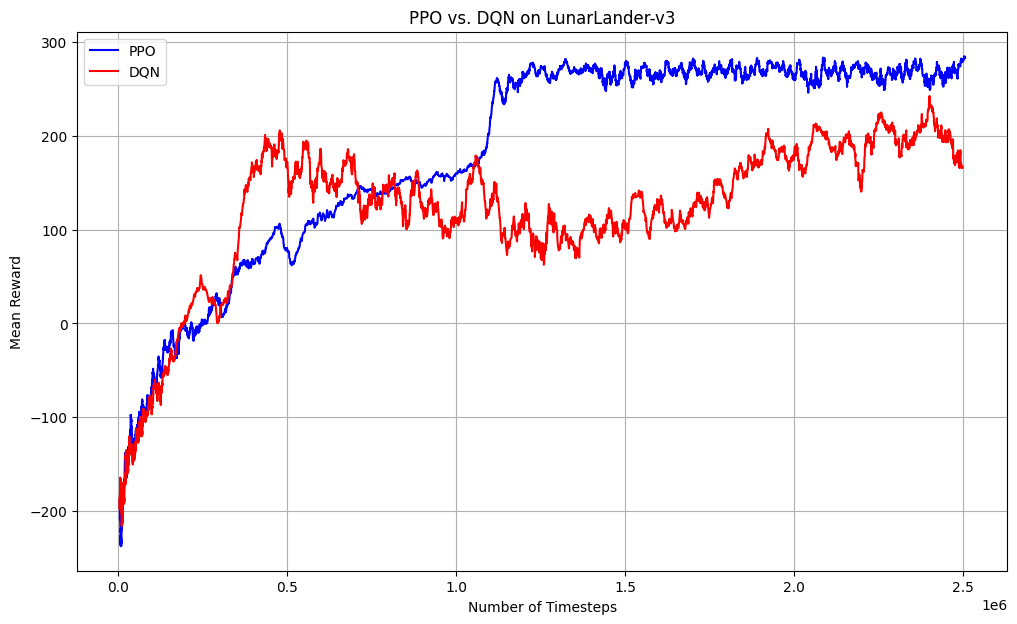

In [14]:
def plot_learning_curves(log_folder_ppo, log_folder_dqn, title='Learning Curve'):
    """ Plots the learning curves from the log files of two models. """
    # Load and smooth PPO results
    x_ppo, y_ppo = ts2xy(load_results(log_folder_ppo), 'timesteps')
    y_ppo_smooth = np.convolve(y_ppo, np.ones(50)/50, mode='valid')
    x_ppo_smooth = x_ppo[len(x_ppo) - len(y_ppo_smooth):]

    # Load and smooth DQN results
    x_dqn, y_dqn = ts2xy(load_results(log_folder_dqn), 'timesteps')
    y_dqn_smooth = np.convolve(y_dqn, np.ones(50)/50, mode='valid')
    x_dqn_smooth = x_dqn[len(x_dqn) - len(y_dqn_smooth):]

    plt.figure(title, figsize=(12, 7))
    plt.plot(x_ppo_smooth, y_ppo_smooth, color='b', label='PPO')
    plt.plot(x_dqn_smooth, y_dqn_smooth, color='r', label='DQN')
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Mean Reward')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

print("\n--- Plotting Learning Curves ---")
plot_learning_curves(ppo_log_dir, dqn_log_dir, "PPO vs. DQN on LunarLander-v3")